# Ford GoBike System Data Presentation
## by Wendy Karimi Patrick

## Investigation Overview

For my presentation I have only put my focus on 6 main specifications i.e riding duration, bike User_type, member gender,weekday, ages of the members, and whether there was bike sharing for all trips. Each presentation will have it's own modifications and findings for the observation made.

I have made plots which are clear and easily interpretable by maintaining a high data-ink ratio. For the presentation I'll mainly focus on the main specifications with the visualizations made in my presentation.





## Dataset Overview



This dataset includes information about individual rides made in a bike sharing system. It contains different specifications which will greatly help us in our analysis.The dataset contains 16 specifications  which consists of information regarding 183412 trips of bike rides. Out of the 16 specifications in the dataset, 7 are float, 2 are integer and 7 are object datatype. The presentation below will mainly focus on only 4 specifications in our dataset. The 4 specifications are, User_Tye, duration, gender and Bike_share. Two more specifications i.e Age and weekday will be added to the original dataset. 

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
Go_Bike=pd.read_csv('Ford GoBike System Data.csv')

In [3]:
Go_Bike.dropna(inplace=True)

In [4]:
Go_Bike.replace([np.inf, -np.inf], inplace=True)
Go_Bike.dropna(subset=['member_birth_year'], inplace=True)


In [5]:
Go_Bike.end_time = Go_Bike.end_time.astype('datetime64')
Go_Bike.start_time = Go_Bike.start_time.astype('datetime64')
Go_Bike.member_birth_year = Go_Bike.member_birth_year.astype('int64')

In [6]:

Go_Bike['Start_date'] = Go_Bike['start_time'].dt.date
Go_Bike['Start_time'] = Go_Bike['start_time'].dt.time
Go_Bike['End_date'] = Go_Bike['end_time'].dt.date
Go_Bike['End_time'] = Go_Bike['end_time'].dt.time

## Visualization 1


There are more men than women. Of the total participants in the bike riding, 74.59% were men, 23.32% were female and other was 2.08%


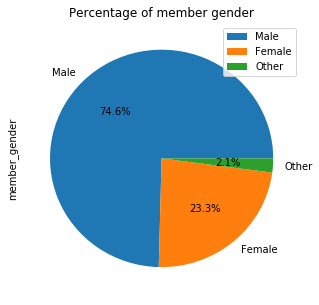

In [7]:
Go_Bike['member_gender'].value_counts().plot(kind='pie',
                                             title='Percentage of member gender',figsize=(5,5),
                                             autopct="%2.1f%%")
#def func(pct, allvalues):
    #absolute = int(pct / 100.*np.sum(allvalues))
    #return "{:.1f}%\n({:d} g)".format(pct, absolute)
 
plt.legend();


## Visualization 2

Most of the riders are between 20 - 40 years. The members ages are skewed to the right.


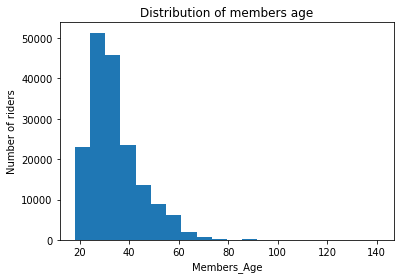

In [8]:
Go_Bike['Start_date'] = Go_Bike['Start_date'].astype('datetime64')
Go_Bike['year'] = Go_Bike['Start_date'].apply(lambda x: x.year)
Go_Bike['Members_Age'] = Go_Bike['year'] - Go_Bike['member_birth_year'] 
plt.hist(data = Go_Bike, x = 'Members_Age', bins = 20)
plt.xlabel('Members_Age')
plt.ylabel('Number of riders')
plt.title('Distribution of members age');

## Visualization 3

 Most of the rides were made on Thursday. The least number of rides were made on Saturday.

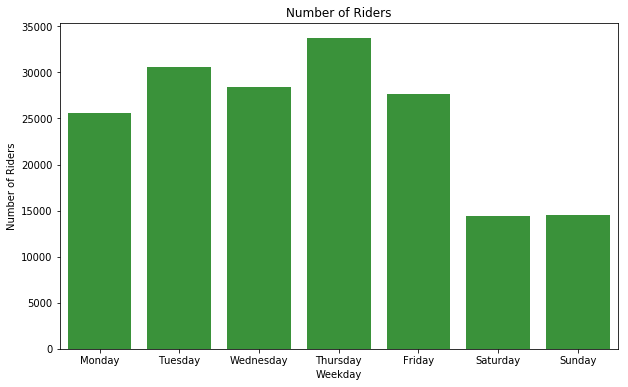

In [9]:
Go_Bike['Start_date'] = Go_Bike['Start_date'].astype('datetime64')
# Create  a weekday column.
Go_Bike['Day_of_Week'] = Go_Bike['Start_date'].dt.weekday_name
# Plot
def bar_chart_solution_1():
    plt.figure(figsize = [10, 6])
    days_ordered = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 
                    'Saturday', 'Sunday']

#Go_Bike['days_ordered'] = pd.Categorical(Go_Bike['Day_of_Week'], 
#                          categories=days_ordered, ordered=True)

    base_color = sb.color_palette()[2]
    sb.countplot(data=Go_Bike, x='Day_of_Week', color=base_color,
                 order=days_ordered);

    plt.title('Number of Riders')
    plt.xlabel('Weekday')
    plt.ylabel('Number of Riders');

bar_chart_solution_1()




## Visualization 4

 Both customer and subscriber user types are available for all genders. With male subscribers being the most riders.

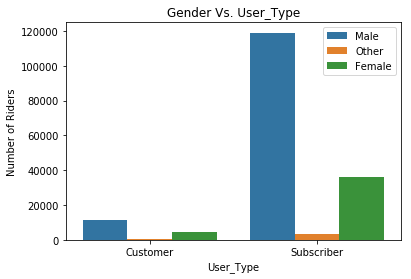

In [10]:
def bar_chart_solution_2():
    sb.countplot(data = Go_Bike, x = 'user_type', hue = 'member_gender')
    plt.title('Gender Vs. User_Type')
    plt.xlabel('User_Type')
    plt.ylabel('Number of Riders')             
    plt.legend();

bar_chart_solution_2()


## Visualization 5

Bike sharing is only available for subscriber user type. Most of the subscriber user types do not share their bikes.

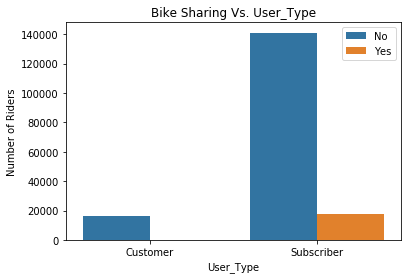

In [11]:
def bar_chart_solution_3():
    Go_Bike['user_type'].groupby(Go_Bike['bike_share_for_all_trip']).value_counts().unstack()
    sb.countplot(data = Go_Bike, x = 'user_type', 
                 hue = 'bike_share_for_all_trip')
    plt.title('Bike Sharing Vs. User_Type')
    plt.xlabel('User_Type')
    plt.ylabel('Number of Riders')             
    plt.legend();
bar_chart_solution_3()

## Visualization 6

Most of the members turned up on Thusrday for each gender. Saturday had the least number of females turning up than the rest of the week. For males the least turnup was on Sunday.
   

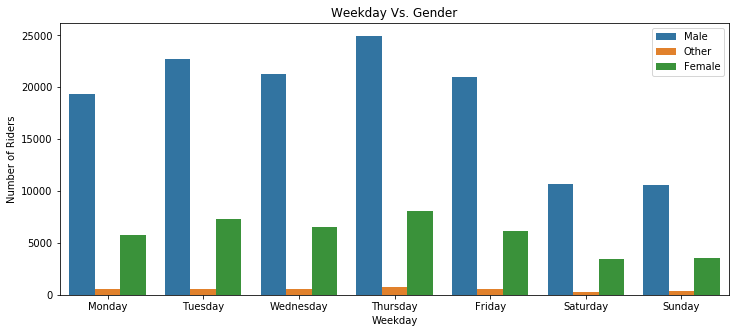

In [12]:
def bar_chart_solution_4():
    plt.figure(figsize = [12,5])
    days_ordered = ['Monday', 'Tuesday', 'Wednesday', 'Thursday','Friday',
                    'Saturday','Sunday']
    sb.countplot(data = Go_Bike, x = 'Day_of_Week', hue = 'member_gender',
             order=  days_ordered)
    plt.title('Weekday Vs. Gender')
    plt.xlabel('Weekday')
    plt.ylabel('Number of Riders')  
    plt.legend();

bar_chart_solution_4()

## Visualization 7

Riders between 20 - 40 years spend a longer duration of time during riding. 

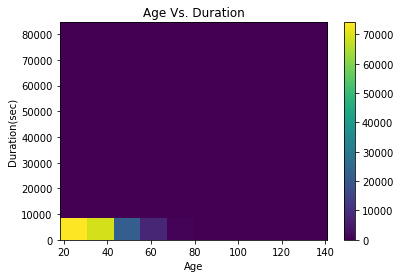

In [13]:
plt.hist2d(data = Go_Bike, x = 'Members_Age', y = 'duration_sec')
plt.colorbar()
plt.xlabel('Age')
plt.ylabel('Duration(sec)');
plt.title('Age Vs. Duration');


## Visualization 8

Even though most of the rides were made on Thursday the trip made were not the longest.The longest trips were made on Sunday, followed by Saturday, then Friday.The longest trips were made on weekends.

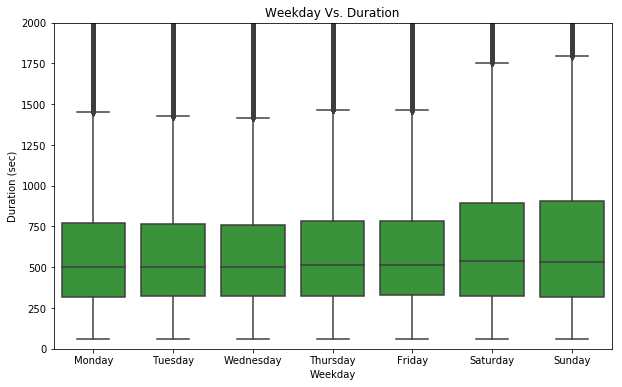

In [14]:
plt.figure(figsize = [10, 6])
days_ordered = ['Monday', 'Tuesday', 'Wednesday', 'Thursday','Friday', 
                'Saturday','Sunday']
base_color = sb.color_palette()[2]
sb.boxplot(data = Go_Bike, x = 'Day_of_Week', y = 'duration_sec', 
           color = base_color,order=days_ordered)
plt.ylim([0, 2000])
plt.xlabel('Weekday')
plt.ylabel('Duration (sec)')
plt.title('Weekday Vs. Duration')
plt.show();




## Visualization 9

Longer trips are associated with not sharing bikes especially for the other gender. For females those who shared bikes spent more time than those who did not share.

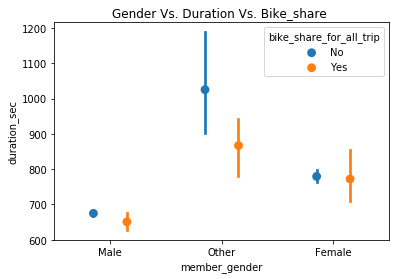

In [15]:
ax = sb.pointplot(data = Go_Bike, x = 'member_gender', y = 'duration_sec', hue = 'bike_share_for_all_trip',
                  dodge = 0.3, linestyles = "")
plt.title('Gender Vs. Duration Vs. Bike_share ');

### Generate Slideshow
 

In [ ]:
!jupyter nbconvert Part_II_slide_deck_template.ipynb --to slides --post serve --no-input --no-prompt 
#!jupyter nbconvert Example_Project_Diamonds_Part2.ipynb --to slides --post serve --no-input --no-prompt 